In [1]:
#Linear Discriminant Analysis (LDA) is a dimensionality reduction technique.
#As the name implies dimensionality reduction techniques reduce the number of dimensions (i.e. variables) in a dataset 
#while retaining as much information as possible. 

In [1]:
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np
np.set_printoptions(precision=4)
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [2]:
wine = load_wine()

In [14]:
wine.data

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [15]:
X = pd.DataFrame(wine.data, columns=wine.feature_names)
y = pd.Categorical.from_codes(wine.target, wine.target_names)

In [16]:
X

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [19]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [20]:
df = X.join(pd.Series(y, name='class'))

In [46]:
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,class_0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,class_0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,class_0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,class_0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,class_0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,class_2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,class_2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,class_2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,class_2


In [49]:
class_feature_means = pd.DataFrame(columns=wine.target_names)
class_feature_means

,class_0,class_1,class_2


In [86]:
#my own work
classes=df.groupby('class')
a=classes.get_group("class_0")
dataset=a.values
a=dataset[:,0:13]
dataframe=pd.DataFrame(a, columns=wine.feature_names) 
dataframe

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127,2.8,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.2,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.4,1050
2,13.16,2.36,2.67,18.6,101,2.8,3.24,0.3,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.5,16.8,113,3.85,3.49,0.24,2.18,7.8,0.86,3.45,1480
4,13.24,2.59,2.87,21,118,2.8,2.69,0.39,1.82,4.32,1.04,2.93,735
5,14.2,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
6,14.39,1.87,2.45,14.6,96,2.5,2.52,0.3,1.98,5.25,1.02,3.58,1290
7,14.06,2.15,2.61,17.6,121,2.6,2.51,0.31,1.25,5.05,1.06,3.58,1295
8,14.83,1.64,2.17,14,97,2.8,2.98,0.29,1.98,5.2,1.08,2.85,1045
9,13.86,1.35,2.27,16,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045


In [84]:
# for index, rows in classes:
#     print(rows)

In [102]:
for c, rows in classes:
    class_feature_means[c] = rows.mean()       #class_0[0]
class_feature_means

,class_0,class_1,class_2
alcohol,13.744746,12.278732,13.153750
malic_acid,2.010678,1.932676,3.333750
ash,2.455593,2.244789,2.437083
alcalinity_of_ash,17.037288,20.238028,21.416667
magnesium,106.338983,94.549296,99.312500
total_phenols,2.840169,2.258873,1.678750
flavanoids,2.982373,2.080845,0.781458
nonflavanoid_phenols,0.290000,0.363662,0.447500
proanthocyanins,1.899322,1.630282,1.153542
color_intensity,5.528305,3.086620,7.396250


In [103]:
within_class_scatter_matrix = np.zeros((13,13))
for c, rows in df.groupby('class'):
    rows = rows.drop(['class'], axis=1)
    s = np.zeros((13,13))
    for index, row in rows.iterrows():
        x, mc = row.values.reshape(13,1), class_feature_means[c].values.reshape(13,1)
        s += (x - mc).dot((x - mc).T)
    within_class_scatter_matrix += s

In [104]:
within_class_scatter_matrix

array([[ 4.5859e+01,  1.4303e+00, -2.3291e+00, -1.7013e+01,  3.1383e+00,
         4.7422e+00,  3.9605e+00, -1.7072e-01,  2.9350e+00,  4.3130e+01,
         1.3687e-01, -8.7244e-01,  2.1415e+03],
       [ 1.4303e+00,  1.5532e+02,  3.7434e+00,  7.2582e+01, -1.5563e+02,
        -2.5349e+00, -1.6466e+00,  1.7807e+00,  3.0105e+00, -4.5273e+01,
        -7.3732e+00,  8.1426e+00, -5.7852e+03],
       [-2.3291e+00,  3.7434e+00,  1.1563e+01,  8.4728e+01,  1.2067e+02,
         2.8298e+00,  5.2449e+00,  1.2286e+00,  4.6912e-01,  1.7140e+00,
         4.0639e-01,  1.9095e+00, -8.7672e+01],
       [-1.7013e+01,  7.2582e+01,  8.4728e+01,  1.4012e+03,  5.6662e+02,
         1.9008e+01,  4.3123e+01,  8.2101e+00,  1.6227e+01, -1.7814e+01,
        -1.7204e+00,  3.9486e+01, -5.7458e+03],
       [ 3.1383e+00, -1.5563e+02,  1.2067e+02,  5.6662e+02,  3.1615e+04,
         1.0100e+02,  1.1670e+02, -5.0235e+01,  2.2757e+02,  3.1017e+02,
         2.2078e+01, -4.9198e+01,  8.3344e+04],
       [ 4.7422e+00, -2.5349e+

In [106]:
feature_means = df.mean()
between_class_scatter_matrix = np.zeros((13,13))
for c in class_feature_means:    
    n = len(df.loc[df['class'] == c].index)
    mc, m = class_feature_means[c].values.reshape(13,1), feature_means.values.reshape(13,1)
    between_class_scatter_matrix += n * (mc - m).dot((mc - m).T)

In [107]:
eigen_values, eigen_vectors = np.linalg.eig(np.linalg.inv(within_class_scatter_matrix).dot(between_class_scatter_matrix))

In [108]:
pairs = [(np.abs(eigen_values[i]), eigen_vectors[:,i]) for i in range(len(eigen_values))]
pairs = sorted(pairs, key=lambda x: x[0], reverse=True)
for pair in pairs:
    print(pair[0])

9.08173943504246
4.128469045639491
1.0204177448173753e-15
7.703011378706276e-16
3.9146699562723586e-16
3.0980684977460466e-16
3.0980684977460466e-16
2.7157738537282256e-16
2.2515843414660665e-16
2.0555146791107218e-16
1.9405297001783117e-16
1.208483302716957e-19
0.0


In [109]:
eigen_value_sums = sum(eigen_values)
print('Explained Variance')
for i, pair in enumerate(pairs):
    print('Eigenvector {}: {}'.format(i, (pair[0]/eigen_value_sums).real))

Explained Variance
Eigenvector 0: 0.6874788878860778
Eigenvector 1: 0.31252111211392236
Eigenvector 2: 7.72446359426947e-17
Eigenvector 3: 5.83110508056768e-17
Eigenvector 4: 2.963367279174289e-17
Eigenvector 5: 2.3452078763757068e-17
Eigenvector 6: 2.3452078763757068e-17
Eigenvector 7: 2.0558145298763897e-17
Eigenvector 8: 1.7044275605178285e-17
Eigenvector 9: 1.5560047232537016e-17
Eigenvector 10: 1.4689622067782353e-17
Eigenvector 11: 9.148101670645032e-21
Eigenvector 12: 0.0


In [110]:
w_matrix = np.hstack((pairs[0][1].reshape(13,1), pairs[1][1].reshape(13,1))).real

In [111]:
X_lda = np.array(X.dot(w_matrix))

In [112]:
le = LabelEncoder()
y = le.fit_transform(df['class'])

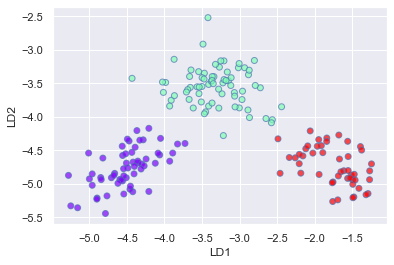

In [113]:
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.scatter(
    X_lda[:,0],
    X_lda[:,1],
    c=y,
    cmap='rainbow',
    alpha=0.7,
    edgecolors='b'
)

In [114]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
X_lda = lda.fit_transform(X, y)

In [115]:
lda.explained_variance_ratio_

array([0.6875, 0.3125])

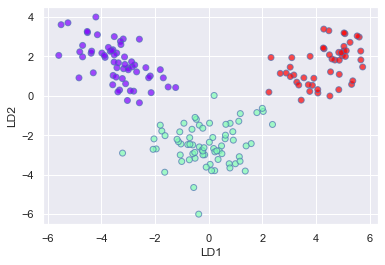

In [116]:
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.scatter(
    X_lda[:,0],
    X_lda[:,1],
    c=y,
    cmap='rainbow',
    alpha=0.7,
    edgecolors='b'
)

In [117]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X, y)

In [118]:
pca.explained_variance_ratio_

array([0.9981, 0.0017])

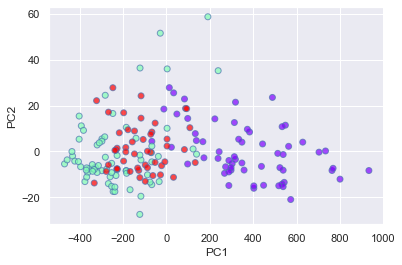

In [119]:
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.scatter(
    X_pca[:,0],
    X_pca[:,1],
    c=y,
    cmap='rainbow',
    alpha=0.7,
    edgecolors='b'
)

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X_lda, y, random_state=1)

In [121]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[18,  0,  0],
       [ 0, 17,  0],
       [ 0,  0, 10]], dtype=int64)